<center>
<h1>Introduction to Deep Learning with Keras</h1>
<h1>and HEP Data Exploration in Python</h1>
<h3>Michela Paganini - Yale University</h3>
<h4>High Energy Phenomenology, Experiment and Cosmology Seminar Series</h4>
<img src='http://www.edustart.org/wp-content/uploads/2014/03/MIST-Vert-Aggie-Maroon-page-001-300x200.jpg'>
</center>


This is the first of two notebooks for today's tutorial. You will find the second one <a href="deeplearning_intro.ipynb">here</a>.

## What is Deep Learning?

> <i>Deep learning is a particular kind of machine learning that achieves great power and ﬂexibility by learning to represent the world as a nested hierarchy of concepts, with each concept deﬁned in relation to simpler concepts, and more abstract representations computed in terms of less abstract ones.</i>

<div align="right">
  I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning", MIT Press, 2016. <br>
  http://www.deeplearningbook.org/
</div>

#### Representation Learning

> <i>Use machine learning to discover not only the mapping from representation to output but also the representation itself. </i>

<div align="right">
  I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning", MIT Press, 2016. <br>
  http://www.deeplearningbook.org/
</div>

*e.g.*:
* What’s 1753 + 131?
* What’s MMXVII - MCMXCI?

Our goal: 
> Learn a function that maps a set of raw electrical signals from the detector all the way to particle identification

From D. Whiteson:
<img src="./images/dwhiteson.jpg">
Deep learning tackles this by breaking down the task into a series of nested and simpler mappings, which can be described by each different layer of the model.
Deeper nets give us the flexibility to sequentially learn more and more abstract features from iterative non-linear transformations of the input data.
Higher layers of representation amplify aspects of the input that are important for the given task and suppress irrelevant variations.

## Learning Recipe

In parametric, supervised learning:
- **Objective**: in the form of a differentiable loss function, to calculate how far your current prediction is from the target
- **Model**: parametrized by learnable parameters
- **Training strategy**: how to update the parameters
- **Data**: enough to learn from & test your performance

---

## Practical Example

From <a href='http://ippog.web.cern.ch/resources/2012/cms-hep-tutorial'> CMS Software Tutorial</a>, developed by Christian Sander and Alexander Schmidt, and available on <a href='http://opendata.cern.ch/'><img src='./images/opendata.jpg' style="height:70px; display:inline;"></a>.

<img src='./images/ttbar.jpg' style="height:200px;"></a>
The samples come from a $t\bar{t}$ analysis and they are described in a very clear and accessible way in the <a href='http://ippog.web.cern.ch/sites/ippog.web.cern.ch/files/TutorialDocu_3.pdf'>documentation</a>. This was chosen to provide you with a full demo of my typical workflow, going from a `ROOT` file to a fully trained Keras model.

**<i>Disclaimer</i>: my applications won't make 100% physical sense -- please focus on the tools!** 

Before diving into the Deep Learning world, I want to spend a few minutes discussing some **data handling techniques** I use whenever I get started prototyping my applications. 

### NumPy

<a href="http://www.numpy.org/"><img src="images/numpy.jpg"></a>

In [1]:
import numpy as np

In [2]:
np.array([[0,1,2], [0,0,0], [1,2,-1]])  #+1 /2 **2 .ravel() etc.

array([[ 0,  1,  2],
       [ 0,  0,  0],
       [ 1,  2, -1]])

For a nice `numpy` intro, check out the CERN tutorial <a href='https://indico.cern.ch/event/487416/contributions/2174910/attachments/1280846/1902714/LYLWN_present_2016_may_slides.pdf'>Loose your Loops with NumPy</a> (and tons of online material).

<i>Idea:</i> What if those columns represented various branches and every line represented an event/physics object?

### From ROOT to numpy: `root_numpy`

Very easy to turn your `.root` files into Machine Learning compliant inputs using `numpy` and <a href="https://github.com/scikit-hep/root_numpy/tree/4.7.3">`root_numpy`</a>.

<a href='http://scikit-hep.org/root_numpy/'><img src='./images/root_numpy.jpg'></a>

In [3]:
from numpy.lib.recfunctions import stack_arrays
from root_numpy import root2array, root2rec
import glob

Welcome to JupyROOT 6.08/02


Using one single function from `root_numpy`, you can open your `.root` file and turn it into an `ndarray`, a Python object equivalent to an n-dimensional matrix. All you need to do is to pass it the name of the file you'd like to open. Other keyword arguments are specified below.
<img src="./images/root2array.jpg">

Let's take a look at the MC signal sample from our CMS open dataset:

In [4]:
ttbar = root2array('files/ttbar.root')

In [5]:
# -- display your newly created object
ttbar 

array([ (3, array([ 14.53632641, -22.59884262,  47.94461823], dtype=float32), array([ 81.21743011, -57.12860489, -11.35455418], dtype=float32), array([  69.889328  ,  214.73963928,  103.36489105], dtype=float32), array([ 109.21035004,  223.63397217,  114.65055084], dtype=float32), array([ 2.04609799,  2.28738594, -1.        ], dtype=float32), array([ True,  True,  True], dtype=bool), 0, array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=int32), array([], dtype=float32), 0, array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=int32), array([], dtype=float32), 0, array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), -30.1446991 , -47.48961639, -24.28571701, -59.33085632,  220.39312744,  20.73790359,  83.93949127,  66.30121613,   7.07375669,  10.14721012,  -10.8865633 ,  55.896091

In [6]:
# -- what data type is it?
type(ttbar) 

numpy.ndarray

In [7]:
# -- how many events are present?
ttbar.shape

(36941,)

In [8]:
# -- what are the names of the branches?
ttbar.dtype.names

('NJet',
 'Jet_Px',
 'Jet_Py',
 'Jet_Pz',
 'Jet_E',
 'Jet_btag',
 'Jet_ID',
 'NMuon',
 'Muon_Px',
 'Muon_Py',
 'Muon_Pz',
 'Muon_E',
 'Muon_Charge',
 'Muon_Iso',
 'NElectron',
 'Electron_Px',
 'Electron_Py',
 'Electron_Pz',
 'Electron_E',
 'Electron_Charge',
 'Electron_Iso',
 'NPhoton',
 'Photon_Px',
 'Photon_Py',
 'Photon_Pz',
 'Photon_E',
 'Photon_Iso',
 'MET_px',
 'MET_py',
 'MChadronicBottom_px',
 'MChadronicBottom_py',
 'MChadronicBottom_pz',
 'MCleptonicBottom_px',
 'MCleptonicBottom_py',
 'MCleptonicBottom_pz',
 'MChadronicWDecayQuark_px',
 'MChadronicWDecayQuark_py',
 'MChadronicWDecayQuark_pz',
 'MChadronicWDecayQuarkBar_px',
 'MChadronicWDecayQuarkBar_py',
 'MChadronicWDecayQuarkBar_pz',
 'MClepton_px',
 'MClepton_py',
 'MClepton_pz',
 'MCleptonPDGid',
 'MCneutrino_px',
 'MCneutrino_py',
 'MCneutrino_pz',
 'NPrimaryVertices',
 'triggerIsoMu24',
 'EventWeight')

## Pandas Dataframes

In [9]:
import pandas as pd

One way of manipulating your data (slicing, filtering, removing variables, creating new features, taking operations of branches) in a simple, visually appealing way is to use <a href="http://pandas.pydata.org/">`pandas`</a> dataframes, a beatiful and efficient Python data structure library. 
Recommended for exploratory data analysis, probably not for high performance applications.

In [10]:
# -- how to turn an ndarray into a pandas dataframe
df = pd.DataFrame(ttbar)

In [11]:
# -- better way of displaying your data
df.head() # print the first few entries

,NJet,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,NMuon,Muon_Px,Muon_Py,...,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,MCneutrino_px,MCneutrino_py,MCneutrino_pz,NPrimaryVertices,triggerIsoMu24,EventWeight
0,3,"[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]","[2.0461, 2.28739, -1.0]","[True, True, True]",0,[],[],...,-47.360596,13.396172,34.925529,15,7.220685,-44.571102,42.757633,6,False,0.286201
1,6,"[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,3,False,0.270030
2,4,"[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]","[-1.0, -1.0, 1.70724, -1.0]","[True, True, True, True]",0,[],[],...,-11.641902,-32.563839,-263.439758,-13,-6.770576,36.392647,-135.825806,6,False,0.293529
3,2,"[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]","[3.63089, 3.02456]","[True, True]",1,[55.77],[12.2147],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,10,False,0.192474
4,3,"[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]","[-1.0, -1.0, 3.74993]","[True, True, True]",0,[],[],...,-49.375671,-30.740866,57.628201,11,2.897522,-13.882012,93.436157,16,False,0.036131


In [12]:
# -- ... or the last few
df.tail()

,NJet,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,NMuon,Muon_Px,Muon_Py,...,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,MCneutrino_px,MCneutrino_py,MCneutrino_pz,NPrimaryVertices,triggerIsoMu24,EventWeight
36936,4,"[130.752, -88.6566, 52.0555, -38.6537]","[-25.4033, 73.8251, -74.2651, -30.6417]","[-120.235, -287.902, -124.879, -128.15]","[180.098, 310.715, 154.604, 137.425]","[-1.0, 2.17192, -1.0, -1.0]","[True, True, True, True]",1,[-44.8889],[42.0714],...,-42.990280,40.279636,-78.633194,-13,13.631536,-7.189492,9.089453,12,True,0.019638
36937,7,"[103.327, -76.9673, -1.77329, -36.4286, 40.127...","[28.3643, 19.0497, -52.6751, -36.7993, -30.191...","[147.432, 428.396, 70.9709, 98.6322, 31.8465, ...","[183.936, 435.736, 88.666, 111.896, 59.8123, 1...","[1.61034, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,5,False,0.293529
36938,1,[9.45587],[56.3299],[58.5212],[83.4685],[-1.0],[True],0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,4,False,0.271386
36939,3,"[34.3826, -40.7835, 38.3874]","[-36.503, -6.54035, -3.93634]","[-39.8918, -50.6091, -69.5358]","[65.9516, 65.8217, 79.7787]","[-1.0, -1.0, -1.0]","[True, True, True]",0,[],[],...,38.085449,4.272717,-61.931725,15,-31.426365,42.423981,-140.161575,11,False,0.224193
36940,3,"[1.28875, 54.2499, -54.3202]","[-84.0194, -25.6156, -8.03408]","[21.7927, 59.1703, 48.221]","[87.8675, 84.7673, 73.5232]","[-1.0, -1.0, 3.45734]","[True, True, True]",0,[],[],...,10.754287,151.415375,-129.318649,-11,-15.814859,-3.380393,-6.439422,8,False,0.299037


In [13]:
# -- check the shape: it should be [nb_events, nb_variables]
df.shape

(36941, 51)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36941 entries, 0 to 36940
Data columns (total 51 columns):
NJet                           36941 non-null int32
Jet_Px                         36941 non-null object
Jet_Py                         36941 non-null object
Jet_Pz                         36941 non-null object
Jet_E                          36941 non-null object
Jet_btag                       36941 non-null object
Jet_ID                         36941 non-null object
NMuon                          36941 non-null int32
Muon_Px                        36941 non-null object
Muon_Py                        36941 non-null object
Muon_Pz                        36941 non-null object
Muon_E                         36941 non-null object
Muon_Charge                    36941 non-null object
Muon_Iso                       36941 non-null object
NElectron                      36941 non-null int32
Electron_Px                    36941 non-null object
Electron_Py                    36941 non-null 

In [15]:
df.keys() #df.columns

Index([u'NJet', u'Jet_Px', u'Jet_Py', u'Jet_Pz', u'Jet_E', u'Jet_btag',
       u'Jet_ID', u'NMuon', u'Muon_Px', u'Muon_Py', u'Muon_Pz', u'Muon_E',
       u'Muon_Charge', u'Muon_Iso', u'NElectron', u'Electron_Px',
       u'Electron_Py', u'Electron_Pz', u'Electron_E', u'Electron_Charge',
       u'Electron_Iso', u'NPhoton', u'Photon_Px', u'Photon_Py', u'Photon_Pz',
       u'Photon_E', u'Photon_Iso', u'MET_px', u'MET_py',
       u'MChadronicBottom_px', u'MChadronicBottom_py', u'MChadronicBottom_pz',
       u'MCleptonicBottom_px', u'MCleptonicBottom_py', u'MCleptonicBottom_pz',
       u'MChadronicWDecayQuark_px', u'MChadronicWDecayQuark_py',
       u'MChadronicWDecayQuark_pz', u'MChadronicWDecayQuarkBar_px',
       u'MChadronicWDecayQuarkBar_py', u'MChadronicWDecayQuarkBar_pz',
       u'MClepton_px', u'MClepton_py', u'MClepton_pz', u'MCleptonPDGid',
       u'MCneutrino_px', u'MCneutrino_py', u'MCneutrino_pz',
       u'NPrimaryVertices', u'triggerIsoMu24', u'EventWeight'],
      dtype='objec

To summarize, if you want to go directly from `.root` files to pandas dataframes, you can do so in 3 lines of Python code. I like to use this function below in all my application whenever I load in data from a `ROOT` file. Feel free to copy it and use it!

In [16]:
def root2pandas(files_path, tree_name, **kwargs):
    '''
    Args:
    -----
        files_path: a string like './data/*.root', for example
        tree_name: a string like 'Collection_Tree' corresponding to the name of the folder inside the root 
                   file that we want to open
        kwargs: arguments taken by root2array, such as branches to consider, start, stop, step, etc
    Returns:
    --------    
        output_panda: a pandas dataframe like allbkg_df in which all the info from the root file will be stored
    
    Note:
    -----
        if you are working with .root files that contain different branches, you might have to mask your data
        in that case, return pd.DataFrame(ss.data)
    '''
    # -- create list of .root files to process
    files = glob.glob(files_path)
    
    # -- process ntuples into rec arrays
    ss = stack_arrays([root2array(fpath, tree_name, **kwargs).view(np.recarray) for fpath in files])

    try:
        return pd.DataFrame(ss)
    except Exception:
        return pd.DataFrame(ss.data)

In [17]:
# -- usage of root2pandas
singletop = root2pandas('./files/single_top.root', 'events')

We just turned a HEP-specific `ROOT` file into a standard data format that can be used by any ML expert. You can now save your data out to widely accepted data formats such as `HDF5` or even `CSV`, share it with your collaborators from the ML community without them having to learn how to use the ROOT library or other CERN-specific analysis tools.

In [28]:
# -- save a pandas df to hdf5 (better to first convert it back to ndarray, to be fair)
import deepdish.io as io
io.save('ttbar.h5', df)

/Users/mp744/venvs/keras2tf1/lib/python2.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E', 'Jet_btag', 'Jet_ID', 'Muon_Px', 'Muon_Py', 'Muon_Pz', 'Muon_E', 'Muon_Charge', 'Muon_Iso', 'Electron_Px', 'Electron_Py', 'Electron_Pz', 'Electron_E', 'Electron_Charge', 'Electron_Iso', 'Photon_Px', 'Photon_Py', 'Photon_Pz', 'Photon_E', 'Photon_Iso']]

  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
singletop.to_hdf('try.h5', 'branches')

/Users/mp744/venvs/keras2tf1/lib/python2.7/site-packages/pandas/core/generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E', 'Jet_btag', 'Jet_ID', 'Muon_Px', 'Muon_Py', 'Muon_Pz', 'Muon_E', 'Muon_Charge', 'Muon_Iso', 'Electron_Px', 'Electron_Py', 'Electron_Pz', 'Electron_E', 'Electron_Charge', 'Electron_Iso', 'Photon_Px', 'Photon_Py', 'Photon_Pz', 'Photon_E', 'Photon_Iso']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [30]:
# -- let's load it back in to make sure it actually worked!
new_df = io.load('ttbar.h5')
new_df.head()

,NJet,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,NMuon,Muon_Px,Muon_Py,...,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,MCneutrino_px,MCneutrino_py,MCneutrino_pz,NPrimaryVertices,triggerIsoMu24,EventWeight
0,3,"[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]","[2.0461, 2.28739, -1.0]","[True, True, True]",0,[],[],...,-47.360596,13.396172,34.925529,15,7.220685,-44.571102,42.757633,6,False,0.286201
1,6,"[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,3,False,0.270030
2,4,"[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]","[-1.0, -1.0, 1.70724, -1.0]","[True, True, True, True]",0,[],[],...,-11.641902,-32.563839,-263.439758,-13,-6.770576,36.392647,-135.825806,6,False,0.293529
3,2,"[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]","[3.63089, 3.02456]","[True, True]",1,[55.77],[12.2147],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,10,False,0.192474
4,3,"[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]","[-1.0, -1.0, 3.74993]","[True, True, True]",0,[],[],...,-49.375671,-30.740866,57.628201,11,2.897522,-13.882012,93.436157,16,False,0.036131


In [31]:
# -- check the shape again -- nice check to run every time you create a df
new_df.shape

(36941, 51)

---

Now, let's create a new dataframe that contains only jet-related branches by slicing our pre-existing ttbar dataframe

In [19]:
# slice the dataframe
jet_df = df[[key for key in df.keys() if key.startswith('Jet')]]
jet_df.head()

,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID
0,"[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]","[2.0461, 2.28739, -1.0]","[True, True, True]"
1,"[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]"
2,"[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]","[-1.0, -1.0, 1.70724, -1.0]","[True, True, True, True]"
3,"[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]","[3.63089, 3.02456]","[True, True]"
4,"[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]","[-1.0, -1.0, 3.74993]","[True, True, True]"


This would be useful if you wanted to classify your events only by using the properties of jets in each event. 

What if your application involved classifying jets, instead of events? In this case, you might want to turn your dataset from event-flat to jet-flat, i.e. a dataframe in which every row represents a jet and every column is a property of this jet. This is extremely easy to do using `pandas` and `numpy`:

In [20]:
def flatten(column):
    '''
    Args:
    -----
        column: a column of a pandas df whose entries are lists (or regular entries -- in which case nothing is done)
                e.g.: my_df['some_variable'] 

    Returns:
    --------    
        flattened out version of the column. 

        For example, it will turn:
        [1791, 2719, 1891]
        [1717, 1, 0, 171, 9181, 537, 12]
        [82, 11]
        ...
        into:
        1791, 2719, 1891, 1717, 1, 0, 171, 9181, 537, 12, 82, 11, ...
    '''
    try:
        return np.array([v for e in column for v in e])
    except (TypeError, ValueError):
        return column

In [21]:
# -- ok, let's try it out!
df_flat = pd.DataFrame({k: flatten(c) for k, c in jet_df.iteritems()})
df_flat.head()

,Jet_E,Jet_ID,Jet_Px,Jet_Py,Jet_Pz,Jet_btag
0,109.210350,True,14.536326,81.217430,69.889328,2.046098
1,223.633972,True,-22.598843,-57.128605,214.739639,2.287386
2,114.650551,True,47.944618,-11.354554,103.364891,-1.000000
3,263.246735,True,28.441772,-77.406265,-249.800949,-1.000000
4,105.526070,True,-56.915596,27.354971,-83.384865,-1.000000


### Plot your data using Matplotlib

Using `pandas` in conjunction with `matplotlib`, you can also inspect your variables super quickly. Check out the following cells for a quick example.

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

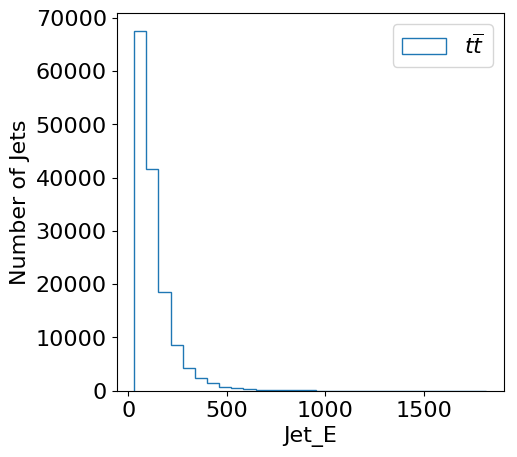

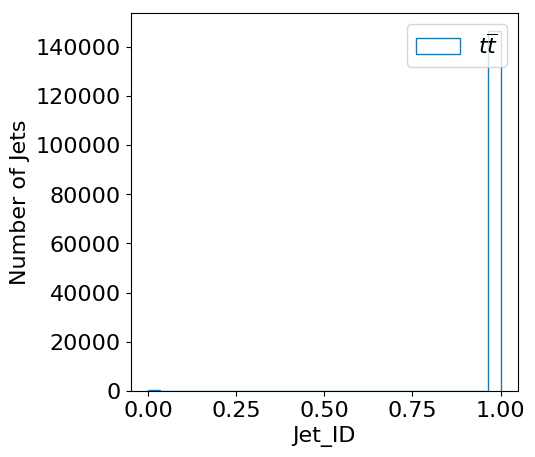

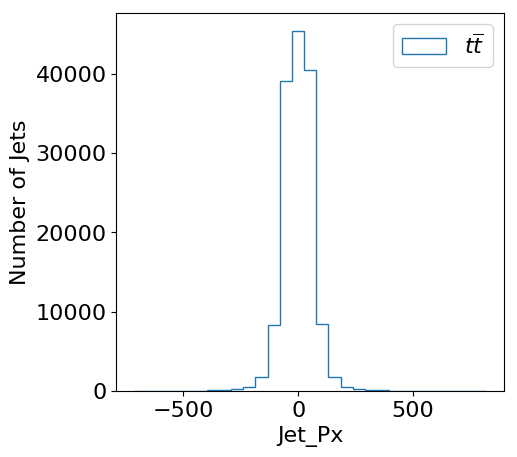

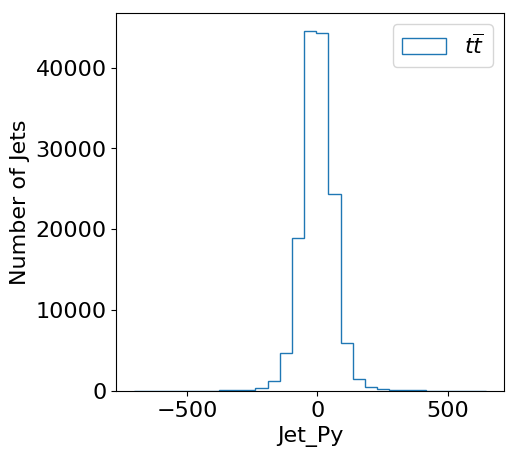

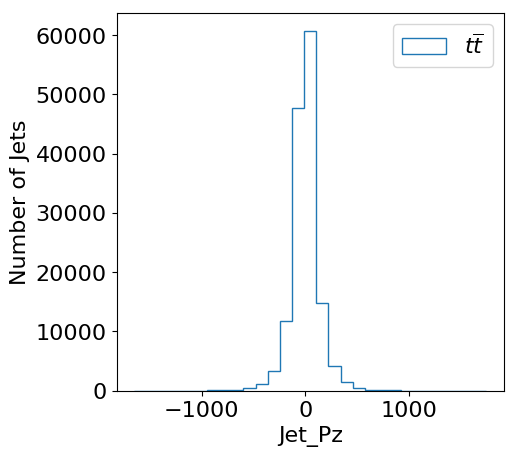

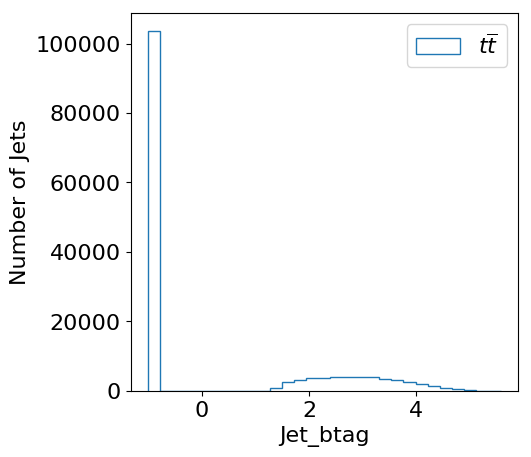

In [23]:
# iterate through the columns
for key in df_flat.keys():
    # plotting settings
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(5, 5), dpi=100)
    bins = np.linspace(min(df_flat[key]), max(df_flat[key]), 30)
    # plot!
    _ = plt.hist(df_flat[key], bins=bins, histtype='step', label=r'$t\overline{t}$')
    # decorate
    plt.xlabel(key)
    plt.ylabel('Number of Jets')
    plt.legend()
    plt.plot()

It's really easy and intuitive to add new columns to a dataframe. You can also define them as functions of other columns. This is great if you need to build your own hand-crafted variables.

In [24]:
df['Jet_P'] = (df['Jet_Px']**2 + df['Jet_Py']**2 + df['Jet_Pz']**2)**(0.5)

In [25]:
# -- again, you can easily slice dataframes by specifying the names of the branches you would like to select 
df[['Jet_P', 'Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']].head()

,Jet_P,Jet_Px,Jet_Py,Jet_Pz,Jet_E
0,"[108.13, 223.355, 114.507]","[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]"
1,"[263.061, 104.598, 72.5371, 70.4365, 50.0759, ...","[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4..."
2,"[79.4521, 55.4131, 55.8585, 42.0104]","[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]"
3,"[71.5054, 84.584]","[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]"
4,"[133.006, 100.772, 61.6009]","[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]"


In [26]:
# -- you can also build four vectors and store them in a new column in 1 line of code 
from rootpy.vector import LorentzVector
df['Jet_4V'] = [map(lambda args: LorentzVector(*args), zip(px, py, pz, e)) for 
                (_, (px, py, pz, e)) in df[['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']].iterrows()]

In [27]:
# -- look at the 4-vectors of the jets in the first 5 events
[_ for _ in df['Jet_4V'].head()]

[[LorentzVector(px=14.536326, py=81.217430, pz=69.889328, E=109.210350),
  LorentzVector(px=-22.598843, py=-57.128605, pz=214.739639, E=223.633972),
  LorentzVector(px=47.944618, py=-11.354554, pz=103.364891, E=114.650551)],
 [LorentzVector(px=28.441772, py=-77.406265, pz=-249.800949, E=263.246735),
  LorentzVector(px=-56.915596, py=27.354971, pz=-83.384865, E=105.526070),
  LorentzVector(px=33.166145, py=53.657883, pz=-35.811634, E=72.998718),
  LorentzVector(px=-56.358620, py=26.635517, pz=32.795723, E=71.044151),
  LorentzVector(px=44.684635, py=-14.142891, pz=17.631155, E=51.121010),
  LorentzVector(px=-7.482028, py=-34.917023, pz=-16.437563, E=40.037487)],
 [LorentzVector(px=-16.001389, py=-59.665871, pz=-49.965702, E=79.995316),
  LorentzVector(px=-41.807266, py=21.093220, pz=-29.628342, E=56.048538),
  LorentzVector(px=29.194143, py=-28.674322, pz=38.021736, E=56.246387),
  LorentzVector(px=38.470554, py=7.808471, pz=-14.963932, E=42.510105)],
 [LorentzVector(px=-40.803673, py=3

In [28]:
# -- calculate the mass (or any other property) of all the jets in the first event
[jet.M() for jet in df['Jet_4V'][0]]

[15.323401924031147, 11.164929207443834, 5.730252080241989]

There is obviously lots you can do with your data once you turn it into a standard Python object and move away from `ROOT`-specific classes. You can now take advantage of state-of-the-art Data Science and Machine Learning libraries to transform your data, while still recovering the functionalities you're used to.

You can now move on to the <a href="deeplearning_intro.ipynb">second notebook</a>.